In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text
import tqdm
import time
import re
from matplotlib.patches import Rectangle

In [2]:
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2

In [3]:
from sklearn.linear_model import LinearRegression
import scipy

In [20]:
from nba_api.stats.static.teams import find_teams_by_full_name, find_team_by_abbreviation
from nba_api.stats.static.players import find_players_by_full_name

from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot
from nba_api.stats.endpoints.leaguedashteamptshot import LeagueDashTeamPtShot
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats


In [5]:
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder

In [6]:
from nba_api.stats.endpoints.leaguedashoppptshot import LeagueDashOppPtShot
from nba_api.stats.endpoints.leaguedashteamptshot import LeagueDashTeamPtShot


In [44]:
finder = LeagueGameFinder(league_id_nullable='00', season_type_nullable='Regular Season', season_nullable='2020-21')

In [45]:
schedule_df = finder.get_data_frames()[0]

## Opp wide open df

In [46]:
opp_data = LeagueDashOppPtShot(per_mode_simple='PerGame', season='2020-21', close_def_dist_range_nullable='6+ Feet - Wide Open')
wide_open_opp_df = opp_data.get_data_frames()[0]

## Wide Open Df

In [47]:
wide_open_df = LeagueDashTeamPtShot(per_mode_simple='PerGame', season='2020-21', close_def_dist_range_nullable='6+ Feet - Wide Open').get_data_frames()[0]

In [48]:
wide_open_by_opponents = []

for i in range(len(wide_open_opp_df)):
    team_id = wide_open_opp_df.iloc[i].TEAM_ID
    matchups = schedule_df.loc[schedule_df.TEAM_ID == team_id].MATCHUP.tolist()
    opponents = set([re.split("@ | vs.", item)[1].strip() for item in matchups])
    fga = 0
    fgm = 0
    for opp in opponents:
        fga += wide_open_df.loc[wide_open_df.TEAM_ABBREVIATION == opp].FG3A.iloc[0]
        fgm += wide_open_df.loc[wide_open_df.TEAM_ABBREVIATION == opp].FG3M.iloc[0]
    wide_open_by_opponents.append(fgm/fga)

In [49]:
wide_open_opp_df.loc[:, 'OPP_WIDE_OPEN_FG3_PCT'] = wide_open_by_opponents

In [50]:
plt.style.use('fivethirtyeight')

In [51]:
wide_open_opp_df.loc[:, 'OPP_WIDE_OPEN_FG3_PCT'] = wide_open_opp_df.OPP_WIDE_OPEN_FG3_PCT * 100
wide_open_opp_df.loc[:, 'FG3_PCT'] = wide_open_opp_df.FG3_PCT * 100

In [52]:
diff = wide_open_opp_df.FG3_PCT - wide_open_opp_df.OPP_WIDE_OPEN_FG3_PCT

In [53]:
wide_open_opp_df.loc[:, 'DIFF'] = diff

In [54]:
wide_open_opp_df

,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,GP,G,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT,OPP_WIDE_OPEN_FG3_PCT,DIFF
0,1610612749,Milwaukee Bucks,MIL,72,72,0.256,10.36,23.79,0.435,0.609,0.041,2.11,3.79,0.557,0.215,8.25,20.00,41.3,39.023780,2.276220
1,1610612766,Charlotte Hornets,CHA,72,72,0.270,9.92,23.76,0.417,0.591,0.030,1.68,2.61,0.644,0.240,8.24,21.15,38.9,39.103629,-0.203629
2,1610612753,Orlando Magic,ORL,72,72,0.250,9.83,22.43,0.438,0.609,0.037,2.19,3.35,0.656,0.213,7.64,19.08,40.0,39.185945,0.814055
3,1610612740,New Orleans Pelicans,NOP,72,72,0.247,9.21,22.03,0.418,0.583,0.035,1.94,3.10,0.628,0.212,7.26,18.93,38.4,39.176087,-0.776087
4,1610612751,Brooklyn Nets,BKN,72,72,0.236,9.00,21.56,0.418,0.577,0.039,2.14,3.56,0.602,0.197,6.86,18.00,38.1,38.989640,-0.889640
5,1610612760,Oklahoma City Thunder,OKC,72,72,0.230,8.78,20.94,0.419,0.593,0.030,1.50,2.71,0.554,0.201,7.28,18.24,39.9,39.213886,0.686114
6,1610612759,San Antonio Spurs,SAS,72,72,0.233,8.46,20.92,0.404,0.564,0.039,1.79,3.50,0.512,0.194,6.67,17.42,38.3,39.161746,-0.861746
7,1610612761,Toronto Raptors,TOR,72,72,0.246,9.21,20.83,0.442,0.626,0.031,1.56,2.63,0.593,0.215,7.65,18.21,42.0,39.119463,2.880537
8,1610612745,Houston Rockets,HOU,72,72,0.229,8.78,20.17,0.435,0.605,0.040,1.93,3.49,0.554,0.189,6.85,16.68,41.0,39.201255,1.798745
9,1610612762,Utah Jazz,UTA,72,72,0.220,7.75,20.11,0.385,0.520,0.046,2.32,4.21,0.551,0.174,5.43,15.90,34.1,38.950323,-4.850323


In [56]:
team_stats = LeagueDashTeamStats(measure_type_detailed_defense='Advanced', season='2020-21').get_data_frames()[0]

In [57]:
team_stats = team_stats.loc[:, ['TEAM_ID', 'TEAM_NAME', 'DEF_RATING']]

In [58]:
wide_open_opp_df = pd.merge(left=wide_open_opp_df, right=team_stats, on=['TEAM_ID', 'TEAM_NAME'])

In [35]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
zoom = 0.1
team_root_dir = '../../team_logos_id/'

def get_player_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

def get_team_img(team_id, zoom=zoom):
    #print(path)
    return OffsetImage(plt.imread(f'{team_root_dir}{team_id}.png'), zoom=zoom)

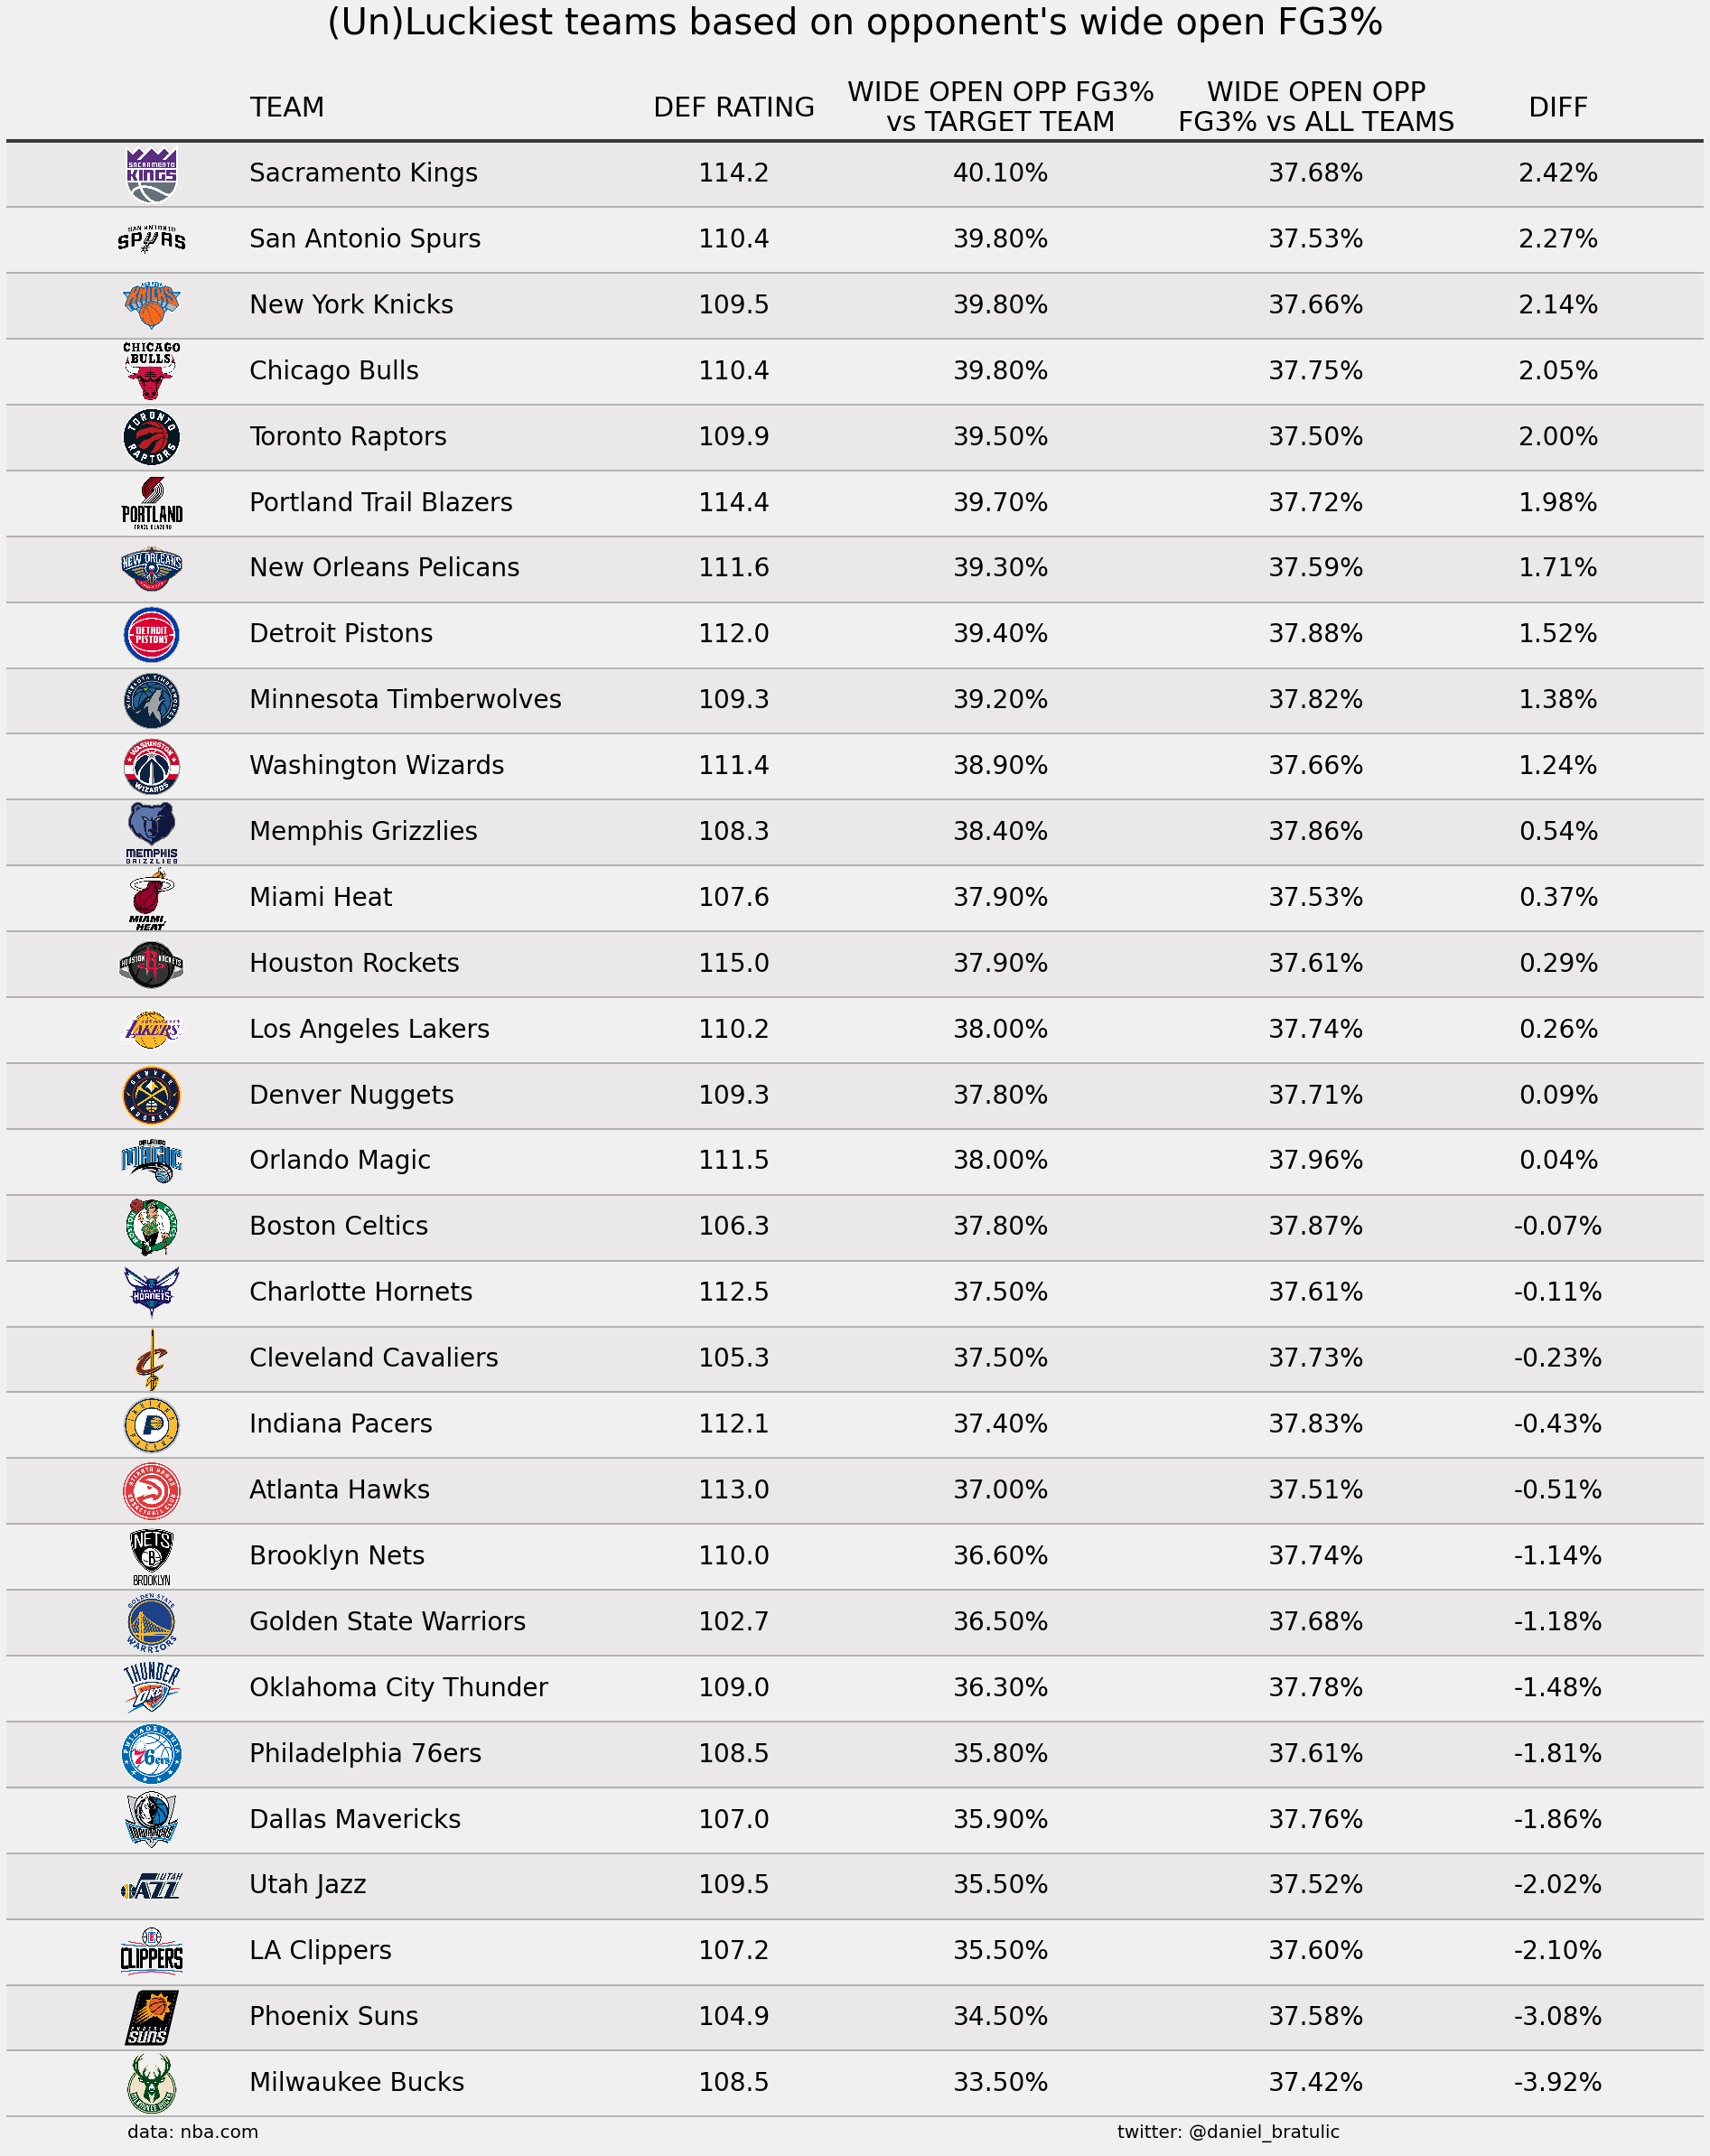

In [30]:
fig, ax = plt.subplots(figsize=(30, 40))
font_size = 28
font_title = 30
top = len(wide_open_opp_df)
#top = 10

sorted_open_df = wide_open_opp_df.sort_values(by='DIFF', ascending=False)
for i in range(top):
    item = sorted_open_df.iloc[i]
    y_coord = top - i - 1
    if i % 2 == 1:
        color = '#EAE8E8'
        rect = Rectangle((-4.5, y_coord + 0.5), width=15, height=1, fill=True, color=color)
        ax.add_patch(rect)
    ax.text(x=0.5, y=y_coord, ha='left', va='center', s=item.TEAM_NAME, size=font_size)
    ax.axhline(y=y_coord-0.5, xmin=-0.25, xmax=10, color='#A0A0A0', alpha=0.75, lw=2)
    
    ax.text(x=1.5, y=y_coord, ha='center', va='center', s=f"{item.DEF_RATING}", size=font_size)
    ax.text(x=2.05, y=y_coord, ha='center', va='center', s=f"{item.FG3_PCT:.2f}%", size=font_size)
    ax.text(x=2.7, y=y_coord, ha='center', va='center', s=f"{item.OPP_WIDE_OPEN_FG3_PCT:.2f}%", size=font_size)
    ax.text(x=3.2, y=y_coord, ha='center', va='center', s=f"{item.DIFF:.2f}%", size=font_size)
    #ax.text(x=3.2, y=y_coord, ha='center', va='center', s=item.MIN, size=font_size)
    #ax.text(x=3.6, y=y_coord, ha='center', va='center', s=item.POINTS, size=font_size)
    #ax.text(x=4, y=y_coord, ha='center', va='center', s=f"{item.SVI:.2f}", size=font_size)
    

    #ax.imshow(player_imgs[item.PLAYER_ID], extent=(0, 0.3, y_coord-0.5,y_coord + 0.5), aspect='auto', zorder=1)
    #ax.imshow(team_imgs[item.TEAM_ID], extent=(0.27, 0.38, y_coord-0.5,y_coord + 0.5), aspect='auto', zorder=1)
    ab = AnnotationBbox(get_team_img(item.TEAM_ID), (0.3, y_coord), frameon=False)
    ax.add_artist(ab)
    
    #y_img_start = y_coord-0.5 + (1 - 0.730769232) / 2
    #ax.imshow(img, extent=(0, 1.36, y_img_start-0.5, y_img_start + 0.1), aspect='auto')
    #ax.imshow(img, extent=(0, 260, 0, 190), aspect=260/190)
    
ax.text(x=0.5, y=top, s='TEAM', ha='left', va='center', size=font_title)
ax.text(x=1.5, y=top, ha='center', va='center', s="DEF RATING", size=font_title)
ax.text(x=2.05, y=top, ha='center', va='center', s="WIDE OPEN OPP FG3%\nvs TARGET TEAM", size=font_title)
ax.text(x=2.7, y=top, ha='center', va='center', s="WIDE OPEN OPP\nFG3% vs ALL TEAMS", size=font_title)
ax.text(x=3.2, y=top, ha='center', va='center', s="DIFF", size=font_title)

ax.text(x=2.75, y=-0.75, s='twitter: @daniel_bratulic', ha='right', va='center', size=20)
ax.text(x=0.25, y=-0.75, s='data: nba.com', ha='left', va='center', size=20)
ax.axhline(y=top-0.5, xmin=-0.25, xmax=10, color='black', alpha=0.75, lw=4)
ax.set_title("(Un)Luckiest teams based on opponent's wide open FG3%", size=40)
    
ax.set_ylim(bottom=-1, top=top+1)
ax.set_xlim(left=-0, right=3.5)
ax.grid(False)
ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.savefig('table_wo_luck.png', dpi=120, bbox_inches='tight')

In [59]:
import matplotlib.ticker as mtick


Text(0.5, 1.0, 'Is it just luck, or is there some influence on wide open 3s? (2020-21 season)')

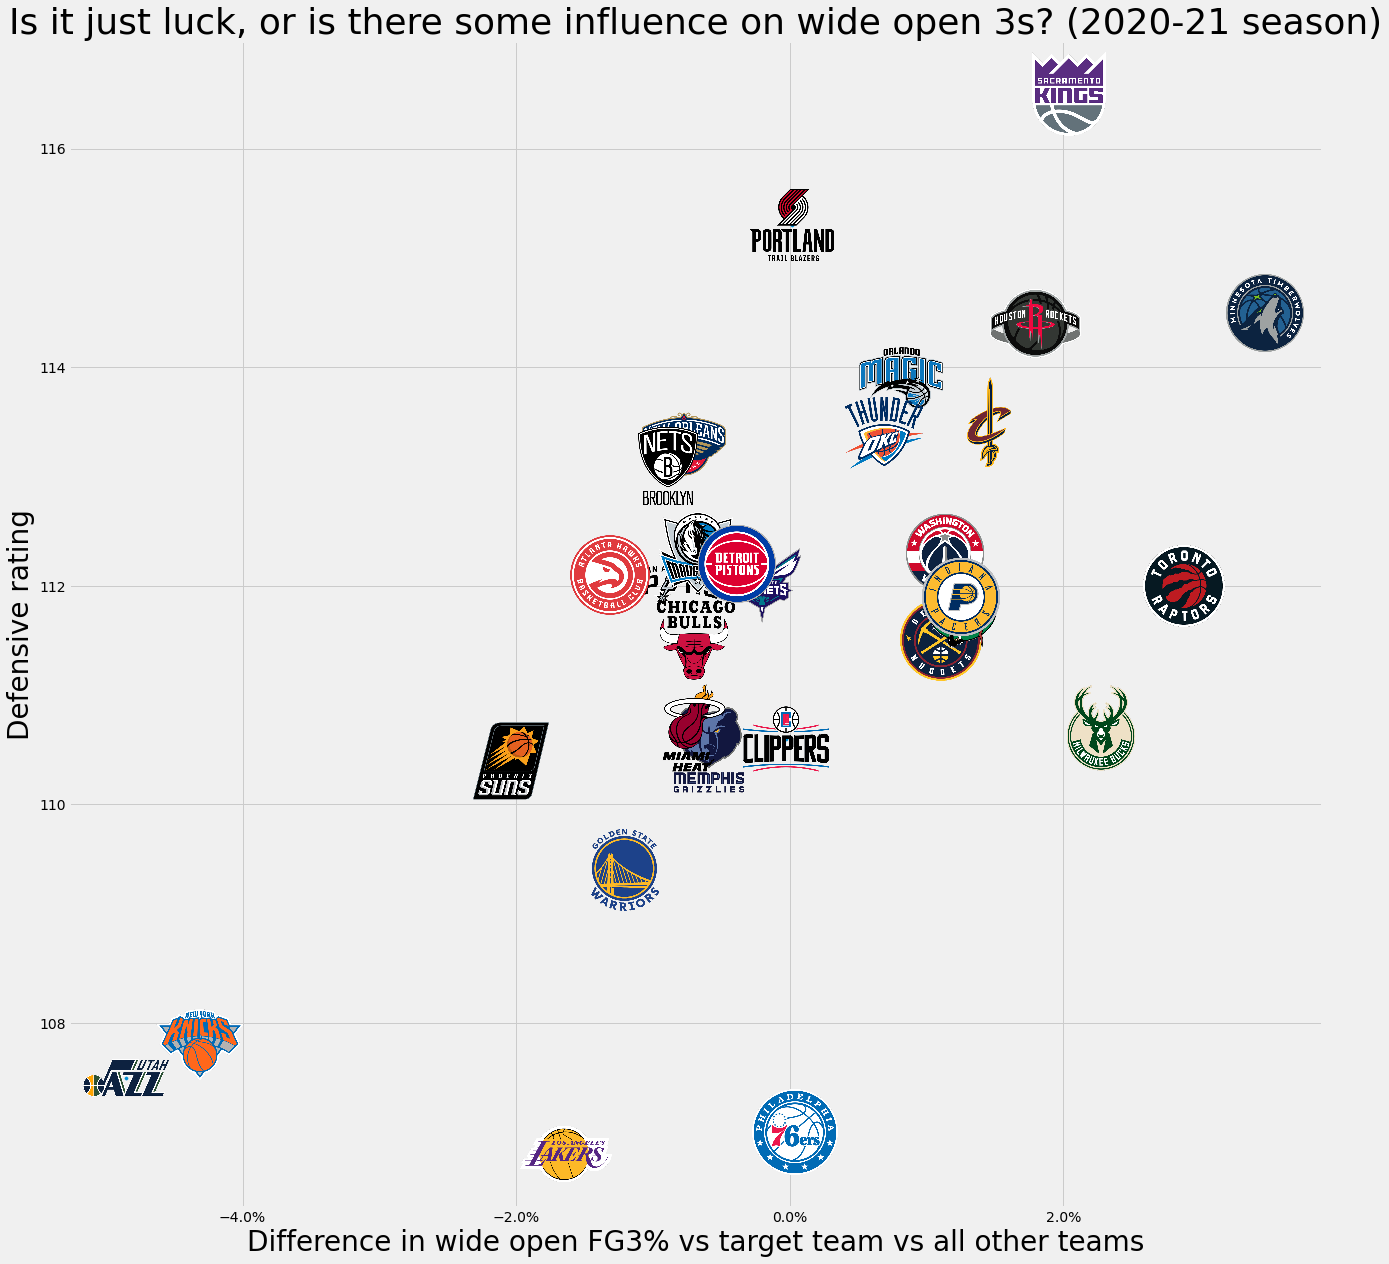

In [61]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(wide_open_opp_df.DIFF, y=wide_open_opp_df.DEF_RATING, s=10)

for i in range(len(wide_open_opp_df)):
    item = wide_open_opp_df.iloc[i]
    ab = AnnotationBbox(get_team_img(item.TEAM_ID, zoom=0.125), (item.DIFF, item.DEF_RATING), frameon=False)
    ax.add_artist(ab)
    

ax.set_xlabel("Difference in wide open FG3% vs target team vs all other teams", size=28)
ax.set_ylabel("Defensive rating", size=28)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Is it just luck, or is there some influence on wide open 3s? (2020-21 season)", size=36)

In [63]:
x = wide_open_opp_df.FG3_PCT.to_numpy().reshape(-1, 1)
y = wide_open_opp_df.DEF_RATING

reg = LinearRegression().fit(x, y)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(wide_open_opp_df.FG3_PCT.to_numpy(), y)

In [64]:
r_value

0.6240259760708684